In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
okcupid = pd.read_csv(r"C:\Users\naren\Downloads\okcupid_profiles.csv")
print(okcupid.columns)
print(np.unique(okcupid['status']))
print(len(okcupid))
okcupid = okcupid.dropna(subset=['status','sex','job','body_type','education', 'height','age','income'])
okcupid= okcupid[okcupid['income']>-1]
okcupid = okcupid.reset_index().drop('index',axis = 1)
print(len(okcupid))

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')
['available' 'married' 'seeing someone' 'single' 'unknown']
59946
10032


In [3]:
print(okcupid.describe())
okcupid= okcupid[okcupid['income']<250000]
okcupid= okcupid[okcupid['height']<80]
okcupid= okcupid[okcupid['age']<65]
okcupid = okcupid.reset_index().drop('index',axis = 1)
print(okcupid.describe())
print(len(okcupid))

                age        height          income
count  10032.000000  10032.000000    10032.000000
mean      32.471093     69.087919   102700.358852
std        9.858371      3.913180   197448.066431
min       18.000000      9.000000    20000.000000
25%       25.000000     67.000000    20000.000000
50%       30.000000     69.000000    50000.000000
75%       37.000000     72.000000   100000.000000
max       69.000000     95.000000  1000000.000000
               age       height         income
count  9323.000000  9323.000000    9323.000000
mean     32.274053    68.997318   57605.920841
std       9.448575     3.705979   36618.439639
min      18.000000    36.000000   20000.000000
25%      25.000000    66.000000   20000.000000
50%      30.000000    69.000000   50000.000000
75%      37.000000    72.000000   80000.000000
max      64.000000    79.000000  150000.000000
9323


In [4]:
print(okcupid['status'].unique())
taken = []
for i in range(len(okcupid)):
	if okcupid['status'][i] == 'married' or okcupid['status'][i] == 'seeing someone':
		taken.append(1)
	else:
		taken.append(0)

print(pd.DataFrame(taken).value_counts())
okcupid['Taken']=taken

['single' 'seeing someone' 'available' 'married' 'unknown']
0    8885
1     438
dtype: int64


In [5]:
print(np.unique(okcupid['job']))
print(np.unique(okcupid['orientation']))
print(np.unique(okcupid['body_type']))
print(np.unique(okcupid['education']))
jobs = np.unique(okcupid['job'])
for i in range(len(jobs)):
    lst=[]
    for z in range(len(okcupid)):
        if okcupid['job'][z]==jobs[i]:
            lst.append(1)
        else:
            lst.append(0)
    okcupid[str(jobs[i])] = lst
straight = []
for i in range(len(okcupid)):
    if okcupid['orientation'][i] == 'straight':
        straight.append(1)
    else:
        straight.append(0)
bi = []
for i in range(len(okcupid)):
    if okcupid['orientation'][i] == 'bisexual':
        bi.append(1)
    else:
        bi.append(0)
gay = []
for i in range(len(okcupid)):
    if okcupid['orientation'][i] == 'gay':
        gay.append(1)
    else:
        gay.append(0)
athletic = []
for i in range(len(okcupid)):
    elements= set(('athletic','fit','jacked'))
    if okcupid['body_type'][i] in elements:
        athletic.append(1)
    else:
        athletic.append(0)
thin = []
for i in range(len(okcupid)):
    elements= set(('skinny','thin'))
    if okcupid['body_type'][i] in elements:
        thin.append(1)
    else:
        thin.append(0)
large = []
for i in range(len(okcupid)):
    elements= set(('curvy','full figured','overweight'))
    if okcupid['body_type'][i] in elements:
        large.append(1)
    else:
        large.append(0)
average = []
for i in range(len(okcupid)):
    elements= set(('average','a little extra'))
    if okcupid['body_type'][i] in elements:
        average.append(1)
    else:
        average.append(0)
college = []
for i in range(len(okcupid)):
    elements= set(('college/university','graduated from college/university','graduated from law school','graduated from med school','graduated from masters program','graduated from ph.d program','graduated from space camp'))
    if okcupid['education'][i] in elements:
        college.append(1)
    else:
        college.append(0)
okcupid['straight']=straight
okcupid['bi']=bi
okcupid['gay']=gay
okcupid['athletic']=athletic
okcupid['thin']=thin
okcupid['large']=large
okcupid['average']=average
okcupid['college']=college

['artistic / musical / writer' 'banking / financial / real estate'
 'clerical / administrative' 'computer / hardware / software'
 'construction / craftsmanship' 'education / academia'
 'entertainment / media' 'executive / management' 'hospitality / travel'
 'law / legal services' 'medicine / health' 'military' 'other'
 'political / government' 'rather not say' 'retired'
 'sales / marketing / biz dev' 'science / tech / engineering' 'student'
 'transportation' 'unemployed']
['bisexual' 'gay' 'straight']
['a little extra' 'athletic' 'average' 'curvy' 'fit' 'full figured'
 'jacked' 'overweight' 'rather not say' 'skinny' 'thin' 'used up']
['college/university' 'dropped out of college/university'
 'dropped out of high school' 'dropped out of law school'
 'dropped out of masters program' 'dropped out of med school'
 'dropped out of ph.d program' 'dropped out of space camp'
 'dropped out of two-year college' 'graduated from college/university'
 'graduated from high school' 'graduated from law 

In [6]:
male=[]
for i in range(len(okcupid)):
    if okcupid['sex'][i]=='m':
        male.append(1)
    else:
        male.append(0)
print(pd.DataFrame(male).value_counts())
okcupid['male'] = male

men = okcupid[okcupid['male']==1]
men = men.reset_index().drop('index',axis = 1)
women = okcupid[okcupid['male']==0]
women = women.reset_index().drop('index',axis = 1)
print(men['Taken'].value_counts())
print(women['Taken'].value_counts())

1    6716
0    2607
dtype: int64
0    6436
1     280
Name: Taken, dtype: int64
0    2449
1     158
Name: Taken, dtype: int64


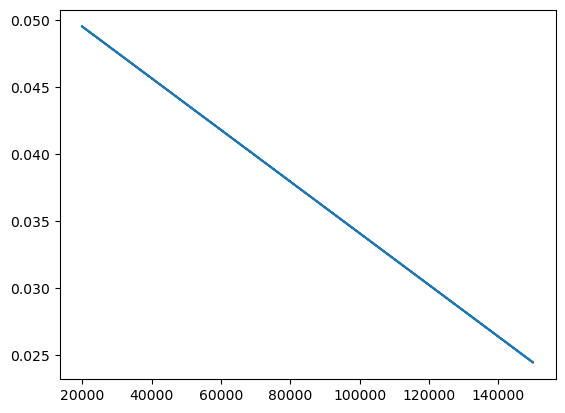

In [7]:
ln = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(men[['income']], men['Taken'], test_size=0.25, random_state = 51)
ln.fit(X_train,y_train)
y_pred = ln.predict(X_test)
plt.plot(X_test,y_pred)
plt.show()

In [8]:
print("coefficients: "+str(ln.coef_))
print("intercept: "+str(ln.intercept_))
print("R2: "+str(ln.score(X_train,y_train)))

coefficients: [-1.92988485e-07]
intercept: 0.053396016037888086
R2: 0.001358934223606001


      y_test    y_pred
0          0  0.049536
1          0  0.047606
2          0  0.037957
3          0  0.034097
4          0  0.037957
...      ...       ...
1674       0  0.037957
1675       0  0.047606
1676       0  0.049536
1677       0  0.034097
1678       0  0.049536

[1679 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

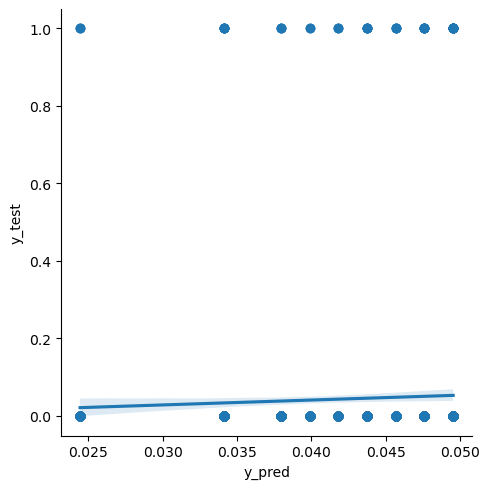

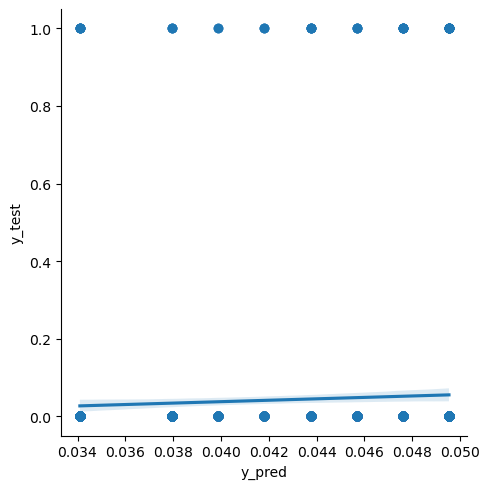

In [9]:
df = pd.DataFrame()
df['y_test']= y_test.reset_index()['Taken']
df['y_pred']=pd.DataFrame(y_pred.reshape(-1,1))
print(df)
plt.figure()
sns.lmplot(data = df, x='y_pred',y='y_test')
sns.lmplot(data = df[df['y_pred']>0.03], x='y_pred',y='y_test')
plt.show()

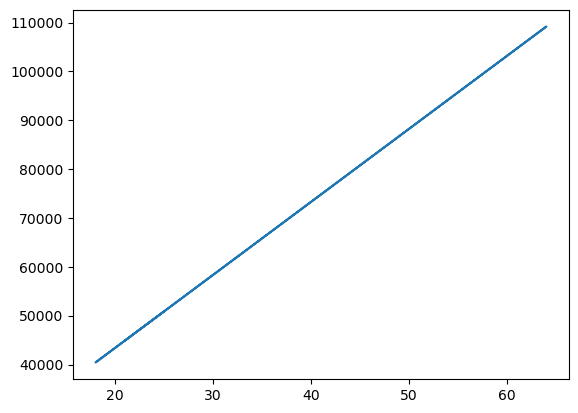

In [10]:
X_train, X_test, y_train, y_test = train_test_split(men[['age']], men['income'], test_size=0.25, random_state = 51)
ln.fit(X_train,y_train)
y_pred = ln.predict(X_test)
plt.plot(X_test,y_pred)
plt.show()

In [11]:
print("coefficients: "+str(ln.coef_))
print("intercept: "+str(ln.intercept_))
print("At age 27: "+str(ln.intercept_+ln.coef_*27))
print("R2: "+str(ln.score(X_train,y_train)))

coefficients: [1495.03495142]
intercept: 13510.272578631688
At age 27: [53876.216267]
R2: 0.13016726430488756


      y_test        y_pred
0      20000  44906.006558
1      30000  49391.111413
2      80000  61351.391024
3     100000  59856.356073
4      80000  55371.251218
...      ...           ...
1674   80000  50886.146364
1675   30000  49391.111413
1676   20000  46401.041510
1677  100000  56866.286170
1678   20000  50886.146364

[1679 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

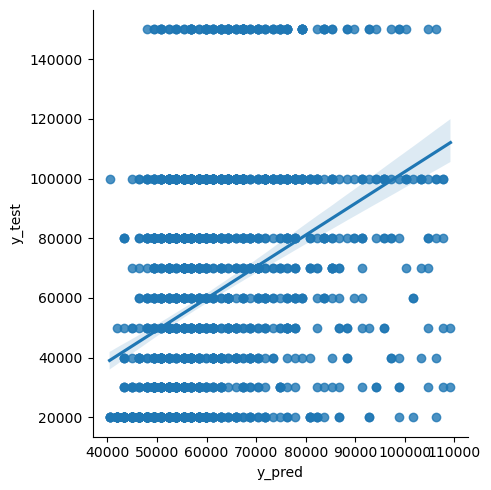

In [12]:
df = pd.DataFrame()
df['y_test']= y_test.reset_index()['income']
df['y_pred']=pd.DataFrame(y_pred.reshape(-1,1))
print(df)
plt.figure()
sns.lmplot(data = df, x='y_pred',y='y_test')
plt.show()

In [13]:
lg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(men[['income']], men['Taken'], test_size=0.25, random_state = 47)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train)))

Coefficients: [[-5.9672764e-05]]
Intercept: [-1.21081978e-08]
Confusion matrix: 
[[1612    0]
 [  67    0]]
Accuracy: 0.9600952948183442
Precision: 0.0
Recall: 0.0
f1: 0.0
R2: 0.957712924359738


C:\Users\naren\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
lg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(women[['income']], women['Taken'], test_size=0.25, random_state = 47)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train)))

Coefficients: [[-6.93012103e-05]]
Intercept: [-4.1878597e-09]
Confusion matrix: 
[[621   0]
 [ 31   0]]
Accuracy: 0.9524539877300614
Precision: 0.0
Recall: 0.0
f1: 0.0
R2: 0.9350383631713555


C:\Users\naren\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
Attractive = okcupid[okcupid['Taken']==1].reset_index().drop(['index'],axis = 1)
def More_Attractive(feature):
    if feature == "age":
        if Attractive['age'].mean()>okcupid['age'].mean():
            return ("On average taken people are "+str(Attractive['age'].mean()-okcupid['age'].mean())+" years older than single people on Okcupid.")
        else:
            return ("On average taken people are "+str(okcupid['age'].mean()-Attractive['age'].mean())+" years younger than single people on Okcupid.")     
    elif feature == "height":
        if Attractive['height'].mean()>okcupid['height'].mean():
            return ("On average taken people are "+str(Attractive['height'].mean()-okcupid['height'].mean())+" inches taller than single people on Okcupid.")
        else:
            return ("On average taken people are "+str(okcupid['height'].mean()-Attractive['height'].mean())+" inches shorter than single people on Okcupid.")
    elif feature == "income":
        if Attractive['income'].mean()>okcupid['income'].mean():
            return ("On average the income of taken people is "+str(Attractive['income'].mean()-okcupid['income'].mean())+" dollars higher than that of single people on Okcupid.")
        else:
            return ("On average the income of taken people is "+str(okcupid['income'].mean()-Attractive['income'].mean())+" dollars lower than that of single people on Okcupid.")
    elif feature == "male":
        if Attractive['male'].mean()>okcupid['male'].mean():
            return (str(Attractive['male'].mean()/okcupid['male'].mean()-1)+" percent more of taken people than single people are male on Okcupid.")
        else:
            return (str(1-Attractive['male'].mean()/okcupid['male'].mean())+" percent fewer of taken people than single people are male on Okcupid.")
    elif feature in np.unique(okcupid['job']):
        if Attractive[feature].mean()>okcupid[feature].mean():
            return (str(Attractive[feature].mean()/okcupid[feature].mean()-1)+" percent more of taken people than single people have "+str(feature)+" as a job.")
        else:
            return (str(1-Attractive[feature].mean()/okcupid[feature].mean())+" percent points fewer of taken people than single people have "+str(feature)+" as a job.") 
    elif feature == "straight":
        if Attractive['straight'].mean()>okcupid['straight'].mean():
            return (str(Attractive['straight'].mean()/okcupid['straight'].mean()-1)+" percent more of taken people than single people are straight on Okcupid.")
        else:
            return (str(1-Attractive['straight'].mean()/okcupid['straight'].mean())+" percent fewer of taken people than single people are straight on Okcupid.")
    elif feature == 'bi':
        if Attractive['bi'].mean()>okcupid['bi'].mean():
            return (str(Attractive['bi'].mean()/okcupid['bi'].mean()-1)+" percent more of taken people than single people are bisexual on Okcupid.")
        else:
            return (str(1-Attractive['bi'].mean()/okcupid['bi'].mean())+" percent fewer of taken people than single people are bisexual on Okcupid.")
    elif feature == 'gay':
        if Attractive['gay'].mean()>okcupid['gay'].mean():
            return (str(Attractive['gay'].mean()/okcupid['gay'].mean()-1)+" percent more of taken people than single people are gay on Okcupid.")
        else:
            return (str(1-Attractive['gay'].mean()/okcupid['gay'].mean())+" percent fewer of taken people than single people are gay on Okcupid.")
    elif feature == 'athletic':
        if Attractive['athletic'].mean()>okcupid['athletic'].mean():
            return (str(Attractive['athletic'].mean()/okcupid['athletic'].mean()-1)+" percent more of taken people than single people are athletic on Okcupid.")
        else:
            return (str(1-Attractive['athletic'].mean()/okcupid['athletic'].mean())+" percent fewer of taken people than single people are athletic on Okcupid.")
    elif feature == 'thin':
        if Attractive['thin'].mean()>okcupid['thin'].mean():
            return (str(Attractive['thin'].mean()/okcupid['thin'].mean()-1)+" percent more of taken people than single people are thin on Okcupid.")
        else:
            return (str(1-Attractive['thin'].mean()/okcupid['thin'].mean())+" percent fewer of taken people than single people are thin on Okcupid.")
    elif feature == 'large':
        if Attractive['large'].mean()>okcupid['large'].mean():
            return (str(Attractive['large'].mean()/okcupid['large'].mean()-1)+" percent more of taken people than single people are large on Okcupid.")
        else:
            return (str(1-Attractive['large'].mean()/okcupid['large'].mean())+" percent fewer of taken people than single people are large on Okcupid.") 
    elif feature == 'college':
        if Attractive['college'].mean()>okcupid['college'].mean():
            return (str(Attractive['college'].mean()/okcupid['college'].mean()-1)+" percent more of taken people than single people are college graduates on Okcupid.")
        else:
            return (str(1-Attractive['college'].mean()/okcupid['college'].mean())+" percent fewer of taken people than single people are college graduates on Okcupid.")
    else:
        colum=input("Choose numeric column:")
        return (More_Attractive(colum))
            
print(More_Attractive('college'))
print(More_Attractive('military'))
print(More_Attractive('income'))
print(More_Attractive('drugs'))

0.0812339240460398 percent fewer of taken people than single people are college graduates on Okcupid.
0.7466025222874537 percent points fewer of taken people than single people have military as a job.
On average the income of taken people is 9752.039562392216 dollars lower than that of single people on Okcupid.
Choose numeric column:military
0.7466025222874537 percent points fewer of taken people than single people have military as a job.


In [16]:
Attractive_men = men[men['Taken']==1].reset_index().drop(['index'],axis = 1)
def More_Attractive_men(feature):
    if feature == "age":
        if Attractive_men['age'].mean()>men['age'].mean():
            return ("On average taken men are "+str(Attractive_men['age'].mean()-men['age'].mean())+" years older than single men on okcupid.")
        else:
            return ("On average taken men are "+str(men['age'].mean()-Attractive_men['age'].mean())+" years younger than single men on okcupid.")     
    elif feature == "height":
        if Attractive_men['height'].mean()>men['height'].mean():
            return ("On average taken men are "+str(Attractive_men['height'].mean()-men['height'].mean())+" inches taller than single men on okcupid.")
        else:
            return ("On average taken men are "+str(men['height'].mean()-Attractive_men['height'].mean())+" inches shorter than single men on okcupid.")
    elif feature == "income":
        if Attractive_men['income'].mean()>men['income'].mean():
            return ("On average the income of taken men is "+str(Attractive_men['income'].mean()-men['income'].mean())+" dollars higher than that of single men on okcupid.")
        else:
            return ("On average the income of taken men is "+str(men['income'].mean()-Attractive_men['income'].mean())+" dollars lower than that of single men on okcupid.")
    elif feature in np.unique(men['job']):
        if Attractive_men[feature].mean()>men[feature].mean():
            return (str(Attractive_men[feature].mean()/men[feature].mean()-1)+" percent more of taken men than single men have "+str(feature)+" as a job.")
        else:
            return (str(1-Attractive_men[feature].mean()/men[feature].mean())+" percent points fewer of taken men than single men have "+str(feature)+" as a job.") 
    elif feature == "straight":
        if Attractive_men['straight'].mean()>men['straight'].mean():
            return (str(Attractive_men['straight'].mean()/men['straight'].mean()-1)+" percent more of taken men than single men are straight on okcupid.")
        else:
            return (str(1-Attractive_men['straight'].mean()/men['straight'].mean())+" percent fewer of taken men than single men are straight on okcupid.")
    elif feature == 'bi':
        if Attractive_men['bi'].mean()>men['bi'].mean():
            return (str(Attractive_men['bi'].mean()/men['bi'].mean()-1)+" percent more of taken men than single men are bisexual on okcupid.")
        else:
            return (str(1-Attractive_men['bi'].mean()/men['bi'].mean())+" percent fewer of taken men than single men are bisexual on okcupid.")
    elif feature == 'gay':
        if Attractive_men['gay'].mean()>men['gay'].mean():
            return (str(Attractive_men['gay'].mean()/men['gay'].mean()-1)+" percent more of taken men than single men are gay on okcupid.")
        else:
            return (str(1-Attractive_men['gay'].mean()/men['gay'].mean())+" percent fewer of taken men than single men are gay on okcupid.")
    elif feature == 'athletic':
        if Attractive_men['athletic'].mean()>men['athletic'].mean():
            return (str(Attractive_men['athletic'].mean()/men['athletic'].mean()-1)+" percent more of taken men than single men are athletic on okcupid.")
        else:
            return (str(1-Attractive_men['athletic'].mean()/men['athletic'].mean())+" percent fewer of taken men than single men are athletic on okcupid.")
    elif feature == 'thin':
        if Attractive_men['thin'].mean()>men['thin'].mean():
            return (str(Attractive_men['thin'].mean()/men['thin'].mean()-1)+" percent more of taken men than single men are thin on okcupid.")
        else:
            return (str(1-Attractive_men['thin'].mean()/men['thin'].mean())+" percent fewer of taken men than single men are thin on okcupid.")
    elif feature == 'large':
        if Attractive_men['large'].mean()>men['large'].mean():
            return (str(Attractive_men['large'].mean()/men['large'].mean()-1)+" percent more of taken men than single men are large on okcupid.")
        else:
            return (str(1-Attractive_men['large'].mean()/men['large'].mean())+" percent fewer of taken men than single men are large on okcupid.") 
    elif feature == 'college':
        if Attractive_men['college'].mean()>men['college'].mean():
            return (str(Attractive_men['college'].mean()/men['college'].mean()-1)+" percent more of taken men than single men are college graduates on okcupid.")
        else:
            return (str(1-Attractive_men['college'].mean()/men['college'].mean())+" percent fewer of taken men than single men are college graduates on okcupid.")
    else:
        colum=input("Choose numeric column:")
        return (More_Attractive_men(colum))
            
print(More_Attractive_men('college'))
print(More_Attractive_men('military'))
print(More_Attractive_men('income'))

0.0013472356587481693 percent fewer of taken men than single men are college graduates on okcupid.
0.7001785714285714 percent points fewer of taken men than single men have military as a job.
On average the income of taken men is 7128.839445248021 dollars lower than that of single men on okcupid.


In [17]:
Attractive_women = women[women['Taken']==1].reset_index().drop(['index'],axis = 1)
def More_Attractive_women(feature):
    if feature == "age":
        if Attractive_women['age'].mean()>women['age'].mean():
            return ("On average taken women are "+str(Attractive_women['age'].mean()-women['age'].mean())+" years older than single women on okcupid.")
        else:
            return ("On average taken women are "+str(women['age'].mean()-Attractive_women['age'].mean())+" years younger than single women on okcupid.")     
    elif feature == "height":
        if Attractive_women['height'].mean()>women['height'].mean():
            return ("On average taken women are "+str(Attractive_women['height'].mean()-women['height'].mean())+" inches taller than single women on okcupid.")
        else:
            return ("On average taken women are "+str(women['height'].mean()-Attractive_women['height'].mean())+" inches shorter than single women on okcupid.")
    elif feature == "income":
        if Attractive_women['income'].mean()>women['income'].mean():
            return ("On average the income of taken women is "+str(Attractive_women['income'].mean()-women['income'].mean())+" dollars higher than that of single women on okcupid.")
        else:
            return ("On average the income of taken women is "+str(women['income'].mean()-Attractive_women['income'].mean())+" dollars lower than that of single women on okcupid.")
    elif feature in np.unique(women['job']):
        if Attractive_women[feature].mean()>women[feature].mean():
            return (str(Attractive_women[feature].mean()/women[feature].mean()-1)+" percent more of taken women than single women have "+str(feature)+" as a job.")
        else:
            return (str(1-Attractive_women[feature].mean()/women[feature].mean())+" percent points fewer of taken women than single women have "+str(feature)+" as a job.") 
    elif feature == "straight":
        if Attractive_women['straight'].mean()>women['straight'].mean():
            return (str(Attractive_women['straight'].mean()/women['straight'].mean()-1)+" percent more of taken women than single women are straight on okcupid.")
        else:
            return (str(1-Attractive_women['straight'].mean()/women['straight'].mean())+" percent fewer of taken women than single women are straight on okcupid.")
    elif feature == 'bi':
        if Attractive_women['bi'].mean()>women['bi'].mean():
            return (str(Attractive_women['bi'].mean()/women['bi'].mean()-1)+" percent more of taken women than single women are bisexual on okcupid.")
        else:
            return (str(1-Attractive_women['bi'].mean()/women['bi'].mean())+" percent fewer of taken women than single women are bisexual on okcupid.")
    elif feature == 'gay':
        if Attractive_women['gay'].mean()>women['gay'].mean():
            return (str(Attractive_women['gay'].mean()/women['gay'].mean()-1)+" percent more of taken women than single women are gay on okcupid.")
        else:
            return (str(1-Attractive_women['gay'].mean()/women['gay'].mean())+" percent fewer of taken women than single women are gay on okcupid.")
    elif feature == 'athletic':
        if Attractive_women['athletic'].mean()>women['athletic'].mean():
            return (str(Attractive_women['athletic'].mean()/women['athletic'].mean()-1)+" percent more of taken women than single women are athletic on okcupid.")
        else:
            return (str(1-Attractive_women['athletic'].mean()/women['athletic'].mean())+" percent fewer of taken women than single women are athletic on okcupid.")
    elif feature == 'thin':
        if Attractive_women['thin'].mean()>women['thin'].mean():
            return (str(Attractive_women['thin'].mean()/women['thin'].mean()-1)+" percent more of taken women than single women are thin on okcupid.")
        else:
            return (str(1-Attractive_women['thin'].mean()/women['thin'].mean())+" percent fewer of taken women than single women are thin on okcupid.")
    elif feature == 'large':
        if Attractive_women['large'].mean()>women['large'].mean():
            return (str(Attractive_women['large'].mean()/women['large'].mean()-1)+" percent more of taken women than single women are large on okcupid.")
        else:
            return (str(1-Attractive_women['large'].mean()/women['large'].mean())+" percent fewer of taken women than single women are large on okcupid.") 
    elif feature == 'college':
        if Attractive_women['college'].mean()>women['college'].mean():
            return (str(Attractive_women['college'].mean()/women['college'].mean()-1)+" percent more of taken women than single women are college graduates on okcupid.")
        else:
            return (str(1-Attractive_women['college'].mean()/women['college'].mean())+" percent fewer of taken women than single women are college graduates on okcupid.")
    else:
        colum=input("Choose numeric column:")
        return (More_Attractive_women(colum))
            
print(More_Attractive_women('college'))
print(More_Attractive_women('military'))
print(More_Attractive_women('income'))

0.2229032258064516 percent fewer of taken women than single women are college graduates on okcupid.
1.0 percent points fewer of taken women than single women have military as a job.
On average the income of taken women is 11309.934790947453 dollars lower than that of single women on okcupid.


In [18]:
X_train, X_test, y_train, y_test = train_test_split(okcupid[['income']], okcupid['athletic'], test_size=0.25, random_state = 47)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Income/athletic body type \n")
print("Okcupid users: \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(men[['income']], men['athletic'], test_size=0.25, random_state = 47)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Male Okcupid users: \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(women[['income']], women['athletic'], test_size=0.25, random_state = 47)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Female Okcupid users: \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

Income/athletic body type 

Okcupid users: 

Coefficients: [[4.23967653e-07]]
Intercept: [-1.41324864e-09]
Confusion matrix: 
[[   0 1294]
 [   0 1037]]
Accuracy: 0.4448734448734449
Precision: 0.4448734448734449
Recall: 1.0
f1: 0.6157957244655582
R2: 0.4343535469107552

Male Okcupid users: 

Coefficients: [[3.58268644e-06]]
Intercept: [-1.00153778e-10]
Confusion matrix: 
[[  0 860]
 [  0 819]]
Accuracy: 0.48779035139964266
Precision: 0.48779035139964266
Recall: 1.0
f1: 0.655724579663731
R2: 0.5096287472702005

Female Okcupid users: 

Coefficients: [[-1.13063308e-05]]
Intercept: [-1.00450362e-09]
Confusion matrix: 
[[484   0]
 [168   0]]
Accuracy: 0.7423312883435583
Precision: 0.0
Recall: 0.0
f1: 0.0
R2: 0.7340153452685422



C:\Users\naren\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
X_train, X_test, y_train, y_test = train_test_split(okcupid[['height','income']], okcupid['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(okcupid[['age', 'height','income']], okcupid['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(men[['height','income']], men['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Male Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(men[['age', 'height','income']], men['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(women[['height','income']], women['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Female Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(women[['age', 'height','income']], women['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

Okcupid users: 

Height and income/athletic body type 

Coefficients: [[-1.41903677e-02  1.28489472e-05]]
Intercept: [-0.00021873]
Confusion matrix: 
[[1015  302]
 [ 602  412]]
Accuracy: 0.6121836121836122
Precision: 0.5770308123249299
Recall: 0.40631163708086787
f1: 0.47685185185185186
R2: 0.6061212814645309

Age, height, and income/athletic body type 

Coefficients: [[-5.75148385e-03 -1.23306523e-02  1.37213245e-05]]
Intercept: [-0.00019006]
Confusion matrix: 
[[1035  282]
 [ 609  405]]
Accuracy: 0.6177606177606177
Precision: 0.5895196506550219
Recall: 0.3994082840236686
f1: 0.47619047619047616
R2: 0.6104118993135011

Male Okcupid users: 

Height and income/athletic body type 

Coefficients: [[-1.03310331e-02  1.21170111e-05]]
Intercept: [-0.00014741]
Confusion matrix: 
[[498 324]
 [388 469]]
Accuracy: 0.5759380583680762
Precision: 0.5914249684741488
Recall: 0.5472578763127188
f1: 0.5684848484848485
R2: 0.5955926146515783

Age, height, and income/athletic body type 

Coefficients: [[

In [20]:
okcupid1=okcupid
print(okcupid['income'])
scaler = StandardScaler()
scaler.fit(okcupid1[['income']])
okcupid1['income'] = scaler.transform(okcupid1[['income']])
scaler.fit(okcupid1[['height']])
okcupid1['height'] = scaler.transform(okcupid1[['height']])
scaler.fit(okcupid1[['age']])
okcupid1['age'] = scaler.transform(okcupid1[['age']])
print(okcupid1['income'])

men1=men
scaler.fit(men1[['income']])
men1['income'] = scaler.transform(men1[['income']])
scaler.fit(men1[['height']])
men1['height'] = scaler.transform(men1[['height']])
scaler.fit(men1[['age']])
men1['age'] = scaler.transform(men1[['age']])

women1=women
scaler.fit(women1[['income']])
women1['income'] = scaler.transform(women1[['income']])
scaler.fit(women1[['height']])
women1['height'] = scaler.transform(women1[['height']])
scaler.fit(women1[['age']])
women1['age'] = scaler.transform(women1[['age']])


0        80000
1        20000
2        40000
3        30000
4        50000
         ...  
9318    100000
9319     50000
9320     70000
9321     80000
9322    100000
Name: income, Length: 9323, dtype: int64
0       0.611585
1      -1.027022
2      -0.480820
3      -0.753921
4      -0.207719
          ...   
9318    1.157787
9319   -0.207719
9320    0.338484
9321    0.611585
9322    1.157787
Name: income, Length: 9323, dtype: float64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(okcupid[['height','income']], okcupid['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(okcupid[['age', 'height','income']], okcupid['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(men[['height','income']], men['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Male Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(men[['age', 'height','income']], men['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

X_train, X_test, y_train, y_test = train_test_split(women[['height','income']], women['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Female Okcupid users: \n")
print("Height and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")
X_train, X_test, y_train, y_test = train_test_split(women[['age', 'height','income']], women['athletic'], test_size=0.25, random_state = 46)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Age, height, and income/athletic body type \n")
print("Coefficients: "+str(lg.coef_))
print("Intercept: "+str(lg.intercept_))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print("Precision: "+str(precision_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test,y_pred)))
print("f1: "+str(f1_score(y_test,y_pred)))
print("R2: "+str(lg.score(X_train,y_train))+"\n")

Okcupid users: 

Height and income/athletic body type 

Coefficients: [[0.28078882 0.46113441]]
Intercept: [-0.26013994]
Confusion matrix: 
[[1039  278]
 [ 566  448]]
Accuracy: 0.6379236379236379
Precision: 0.6170798898071626
Recall: 0.4418145956607495
f1: 0.5149425287356322
R2: 0.6241418764302059

Age, height, and income/athletic body type 

Coefficients: [[-0.12056331  0.2738799   0.50881972]]
Intercept: [-0.26042719]
Confusion matrix: 
[[1042  275]
 [ 577  437]]
Accuracy: 0.6344916344916345
Precision: 0.6137640449438202
Recall: 0.43096646942800787
f1: 0.5063731170336035
R2: 0.625429061784897

Male Okcupid users: 

Height and income/athletic body type 

Coefficients: [[0.01185409 0.4613139 ]]
Intercept: [0.01517792]
Confusion matrix: 
[[513 309]
 [391 466]]
Accuracy: 0.5830851697438951
Precision: 0.6012903225806452
Recall: 0.543757292882147
f1: 0.571078431372549
R2: 0.5973793924955331

Age, height, and income/athletic body type 

Coefficients: [[-0.17090448  0.01435797  0.52826887]]
